In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=FutureWarning)
data = pd.read_csv("diabetes.csv")
df = pd.DataFrame(data)

y = df['Outcome']
X = df.drop(columns = 'Outcome')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [2]:
from lightgbm import LGBMClassifier

In [3]:
lgbm = LGBMClassifier().fit(X_train,y_train)

In [4]:
y_pred = lgbm.predict(X_test)

In [6]:
accuracy_score(y_pred,y_test)

0.7229437229437229

In [7]:
#Model Tunning

In [8]:
lgbm_model = LGBMClassifier()

In [9]:
lgbm_params = {'learning_rate':[0.001,0.1,0.01],
               'n_estimators':[200,500,100],
               'max_depth':[2,3,5,8]}

In [10]:
cv_lgbm = GridSearchCV(lgbm_model,lgbm_params,cv = 10,n_jobs = -1,verbose = 2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 353 out of 360 | elapsed:   18.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   18.9s finished


In [11]:
cv_lgbm.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [18]:
lgbm_tuned = LGBMClassifier(learning_rate=0.001,max_depth=3,n_estimators=500).fit(X_train,y_train)

In [19]:
y_pred = lgbm_tuned.predict(X_test)

In [20]:
accuracy_score(y_pred,y_test)

0.7229437229437229

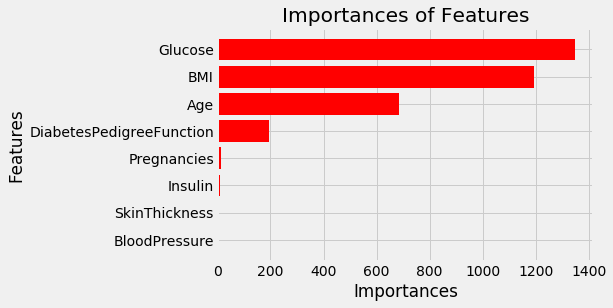

In [24]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()
importances = pd.Series(lgbm_tuned.feature_importances_,index = X_train.columns).sort_values(ascending = False)
ax.barh(importances.index,importances,color = 'r',linewidth = 0.1)
ax.invert_yaxis()
ax.set_xlabel('Importances')
ax.set_ylabel('Features')
ax.set_title('Importances of Features')
plt.show()